# Random Forest Classifier

will be a different form of classification. 

In [10]:
# imports
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [11]:
df = pd.read_csv('cleaned_data.csv')
clustered_data = pd.read_csv('cluster_labels.csv')
df.head()

,Year,Customer Age,Customer Gender,Product Category,Quantity,Unit Price,Profit Margin,Age Group,Quarter
0,2016,29,F,Accessories,1,109.000000,0.266055,25-34,Q1
1,2016,29,F,Clothing,2,28.500000,0.140351,25-34,Q1
2,2016,29,F,Accessories,3,5.000000,0.266667,25-34,Q1
3,2016,29,F,Accessories,2,116.500000,0.248927,25-34,Q1
4,2016,29,F,Accessories,3,41.666667,0.160000,25-34,Q1


In [12]:
clustered_data.head()

,index,Date,Customer Gender,Country,State,Product Category,Sub Category,Quantity,Revenue,Cluster
0,0,02/19/16,F,United States,Washington,Accessories,Tires and Tubes,1.0,109.0,4
1,1,02/20/16,F,United States,Washington,Clothing,Gloves,2.0,57.0,7
2,2,02/27/16,F,United States,Washington,Accessories,Tires and Tubes,3.0,15.0,7
3,3,03/12/16,F,United States,Washington,Accessories,Tires and Tubes,2.0,233.0,7
4,4,03/12/16,F,United States,Washington,Accessories,Tires and Tubes,3.0,125.0,7


In [13]:
#hot encoding
cluster_encoded_data = pd.get_dummies(clustered_data, columns=['Cluster', 'Country', 'State', 'Customer Gender', 'Product Category', 'Sub Category'], drop_first=True)
cluster_encoded_data.head()

,index,Date,Quantity,Revenue,Cluster_1,Cluster_2,Cluster_3,Cluster_4,Cluster_5,Cluster_6,...,Sub Category_Helmets,Sub Category_Hydration Packs,Sub Category_Jerseys,Sub Category_Mountain Bikes,Sub Category_Road Bikes,Sub Category_Shorts,Sub Category_Socks,Sub Category_Tires and Tubes,Sub Category_Touring Bikes,Sub Category_Vests
0,0,02/19/16,1.0,109.0,False,False,False,True,False,False,...,False,False,False,False,False,False,False,True,False,False
1,1,02/20/16,2.0,57.0,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,2,02/27/16,3.0,15.0,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
3,3,03/12/16,2.0,233.0,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
4,4,03/12/16,3.0,125.0,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False


In [14]:
# Step 1: Prepare the data
# Selecting features and target variable
mer_1 = pd.concat([df[['Customer Age', 'Quantity', 'Unit Price', 'Profit Margin']], clustered_data[['Revenue']]], axis=1)
# X = df[['Customer Age', 'Quantity','Unit Price', 'Profit Margin']]
X = mer_1 #features
y = clustered_data['Cluster']  # Assuming 'Revenue' is the target variable

# Step 2: Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 3: Train the model
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

# Step 4: Evaluate the model
y_pred = rf_model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.7846286205907657
Classification Report:
               precision    recall  f1-score   support

           0       0.77      0.73      0.75      1033
           1       0.80      0.82      0.81       690
           2       0.78      0.74      0.76       437
           3       0.77      0.83      0.80       953
           4       0.78      0.80      0.79       805
           5       0.74      0.66      0.69       729
           6       0.76      0.73      0.75       768
           7       0.80      0.84      0.82      1260
           8       0.96      0.97      0.96       299

    accuracy                           0.78      6974
   macro avg       0.80      0.79      0.79      6974
weighted avg       0.78      0.78      0.78      6974



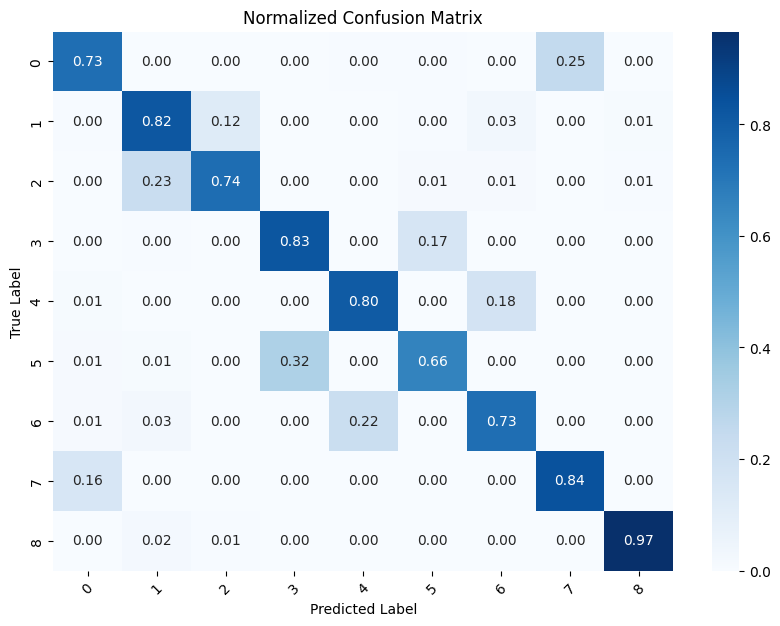

In [15]:
#visualize the classification report
# Create a confusion matrix
cm = confusion_matrix(y_test, y_pred)
# Normalize the confusion matrix
cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
# Get the unique labels from the original target variable
unique_labels = clustered_data['Cluster'].unique()
unique_labels.sort()
# Create a heatmap with proper labels
plt.figure(figsize=(10, 7))
sns.heatmap(cm_normalized, annot=True, fmt='.2f', cmap='Blues', 
            xticklabels=unique_labels, yticklabels=unique_labels)
plt.title('Normalized Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.xticks(rotation=45)
plt.show()

In [16]:
# print(df.columns)
print(cluster_encoded_data.columns)

Index(['index', 'Date', 'Quantity', 'Revenue', 'Cluster_1', 'Cluster_2',
       'Cluster_3', 'Cluster_4', 'Cluster_5', 'Cluster_6', 'Cluster_7',
       'Cluster_8', 'Country_Germany', 'Country_United Kingdom',
       'Country_United States', 'State_Arizona', 'State_Bayern',
       'State_Brandenburg', 'State_California', 'State_Charente-Maritime',
       'State_England', 'State_Essonne', 'State_Florida',
       'State_Garonne (Haute)', 'State_Georgia', 'State_Hamburg',
       'State_Hauts de Seine', 'State_Hessen', 'State_Illinois',
       'State_Kentucky', 'State_Loir et Cher', 'State_Loiret',
       'State_Massachusetts', 'State_Minnesota', 'State_Mississippi',
       'State_Missouri', 'State_Montana', 'State_Moselle', 'State_New York',
       'State_Nord', 'State_Nordrhein-Westfalen', 'State_North Carolina',
       'State_Ohio', 'State_Oregon', 'State_Pas de Calais', 'State_Saarland',
       'State_Seine (Paris)', 'State_Seine Saint Denis',
       'State_Seine et Marne', 'State_Somm

In [17]:
#another feature selection
# safe1 = pd.concat([df[['Customer Age']], cluster_encoded_data[['Customer Gender_M','Sub Category_Road Bikes', 'Sub Category_Tires and Tubes']]], axis=1)
safe1 = pd.concat([df[['Customer Age']], cluster_encoded_data[['Customer Gender_M']]], axis=1)
X2 = pd.concat([safe1, cluster_encoded_data[['State_Arizona', 'State_Bayern',
       'State_Brandenburg', 'State_California', 'State_Charente-Maritime',
       'State_England', 'State_Essonne', 'State_Florida',
       'State_Garonne (Haute)', 'State_Georgia', 'State_Hamburg',
       'State_Hauts de Seine', 'State_Hessen', 'State_Illinois',
       'State_Kentucky', 'State_Loir et Cher', 'State_Loiret',
       'State_Massachusetts', 'State_Minnesota', 'State_Mississippi',
       'State_Missouri', 'State_Montana', 'State_Moselle', 'State_New York',
       'State_Nord', 'State_Nordrhein-Westfalen', 'State_North Carolina',
       'State_Ohio', 'State_Oregon', 'State_Pas de Calais', 'State_Saarland',
       'State_Seine (Paris)', 'State_Seine Saint Denis',
       'State_Seine et Marne', 'State_Somme', 'State_South Carolina',
       'State_Texas', 'State_Utah',
       'State_Virginia', 'State_Washington', 'State_Wyoming', 'State_Yveline']]], axis=1)
# y2 = clustered_data['Cluster']  # Assuming 'Revenue' is the target variable
y2 = cluster_encoded_data[['Cluster_1', 'Cluster_2', 'Cluster_3', 'Cluster_4', 'Cluster_5', 'Cluster_6']]
# Step 2: Split the data
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.2, random_state=42)
# Step 3: Train the model
rf_model2 = RandomForestClassifier(random_state=42)
# Handle missing values in X2
X2 = X2.fillna(0)  # Replace NaN values with 0 (or use another strategy like mean or median)

# Train the model
rf_model2.fit(X2_train, y2_train)
# Step 4: Evaluate the model
y2_pred = rf_model2.predict(X2_test)
print("Accuracy:", (accuracy_score(y2_test, y2_pred) * 100))
print("Classification Report:\n", classification_report(y2_test, y2_pred))

Accuracy: 38.672211069687414
Classification Report:
               precision    recall  f1-score   support

           0       0.29      0.04      0.07       690
           1       0.20      0.01      0.03       437
           2       0.48      0.09      0.15       953
           3       0.28      0.02      0.04       805
           4       0.42      0.04      0.08       729
           5       0.21      0.01      0.02       768

   micro avg       0.37      0.04      0.07      4382
   macro avg       0.32      0.04      0.07      4382
weighted avg       0.33      0.04      0.07      4382
 samples avg       0.03      0.03      0.03      4382



/Users/ggrojas27/Documents/GitHub/INDENG142_Sp25/.venv/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/ggrojas27/Documents/GitHub/INDENG142_Sp25/.venv/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in samples with no true labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/ggrojas27/Documents/GitHub/INDENG142_Sp25/.venv/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in samples with no true nor predicted labels. Use `zero_division` parameter to control this beha

Feature ranking:
1. feature 0 (0.908666)
2. feature 1 (0.021502)
3. feature 5 (0.004120)
4. feature 32 (0.003941)
5. feature 7 (0.003773)
6. feature 27 (0.003614)
7. feature 3 (0.003578)
8. feature 14 (0.003555)
9. feature 30 (0.003300)
10. feature 41 (0.003102)
11. feature 26 (0.003037)
12. feature 33 (0.003032)
13. feature 34 (0.002993)
14. feature 12 (0.002904)
15. feature 8 (0.002701)
16. feature 13 (0.002686)
17. feature 43 (0.002593)
18. feature 35 (0.002143)
19. feature 18 (0.002096)
20. feature 24 (0.002080)
21. feature 4 (0.001976)
22. feature 10 (0.001849)
23. feature 36 (0.001597)
24. feature 6 (0.001514)
25. feature 17 (0.001250)
26. feature 38 (0.001013)
27. feature 15 (0.000911)
28. feature 31 (0.000903)
29. feature 29 (0.000867)
30. feature 25 (0.000819)
31. feature 9 (0.000336)
32. feature 39 (0.000257)
33. feature 42 (0.000254)
34. feature 16 (0.000238)
35. feature 19 (0.000218)
36. feature 20 (0.000172)
37. feature 28 (0.000135)
38. feature 40 (0.000113)
39. feature 3

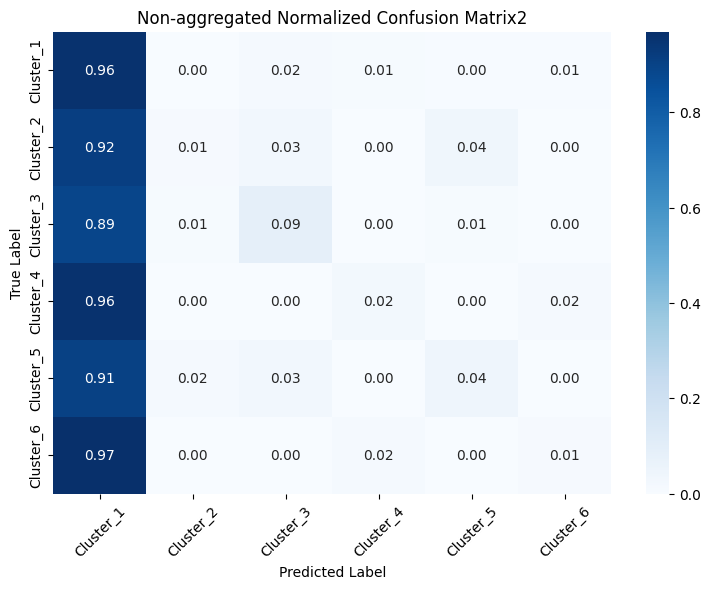

In [33]:
#Feature Importance
importances = rf_model2.feature_importances_
indices = np.argsort(importances)[::-1]
# Print the feature ranking
print("Feature ranking:")
for f in range(X2.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

#make a confusion matrix
cm2 = confusion_matrix(y2_test.values.argmax(axis=1), y2_pred.argmax(axis=1))
# Normalize the confusion matrix
cm2_normalized = cm2.astype('float') / cm2.sum(axis=1)[:, np.newaxis]
# Get the unique labels from the original target variable
unique_labels2 = ['Cluster_1', 'Cluster_2', 'Cluster_3', 'Cluster_4', 'Cluster_5', 'Cluster_6']
plt.figure(figsize=(9, 6))
sns.heatmap(cm2_normalized, annot=True, fmt='.2f', cmap='Blues', 
            xticklabels=unique_labels2, yticklabels=unique_labels2)
plt.title('Non-aggregated Normalized Confusion Matrix2')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.xticks(rotation=45)
plt.show()
